In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Tehran

In [2]:
rt = requests.get("https://iran.1stquest.com/hotel/tehran")

In [3]:
rt.status_code

200

In [4]:
soup = BeautifulSoup(rt.content, "html.parser")

In [5]:
results = soup.find_all('figcaption')
result_teh = [result for result in results if not result.find('h5')]
result_teh

[<figcaption>
 <!-- hotel star -->
 <div class="landing-hotel-title">
 <div class="rating">
 <span><i class="fa fa-star orange"></i></span>
 <span><i class="fa fa-star orange"></i></span>
 <span><i class="fa fa-star orange"></i></span>
 <span><i class="fa fa-star orange"></i></span>
 <span><i class="fa fa-star orange"></i></span>
 </div>
 <span>5 Star Hotel</span>
 <span class="hotel-tag hidden-xs">Luxury</span>
 <span class="hotel-tag hidden-xs">Business</span>
 </div>
 <!-- hotel name -->
 <h3 class="landing-hotel-header">
 <a class="gtm-hotel-card-title" data-dlayer="cardIndex:#hc_index_6,title:#hc_title_6" href="https://iran.1stquest.com/hotel/tehran/espinas-palace-hotel" target="_blank" title="Espinas Palace Hotel">
                                         Espinas Palace Hotel
                                     </a>
 </h3>
 <!-- hotel price -->
 <p class="landing-hotel-price hidden-xs">
                                         from
                                         <span>

In [6]:
data_tehran = []
for res in result_teh: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()   
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()  
   
    data_tehran.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [7]:
data_tehran

[{'Name': 'Espinas Palace Hotel',
  'Price': 'from\n                                        €151.65\n                                        per Night',
  'Star': '5 ',
  'Tag': 'Luxury'},
 {'Name': 'Razzaz Boutique Hotel',
  'Price': 'from\n                                        €32.61\n                                        per Night',
  'Star': 'Traditional',
  'Tag': 'Traditional'},
 {'Name': 'Ferdowsi International Grand Hotel',
  'Price': 'from\n                                        €53.85\n                                        per Night',
  'Star': '4 ',
  'Tag': 'Luxury'},
 {'Name': 'Wisteria Hotel',
  'Price': 'from\n                                        €99.96\n                                        per Night',
  'Star': '5 ',
  'Tag': 'Luxury'},
 {'Name': 'Espinas International (Khalij-e Fars)',
  'Price': 'from\n                                        €110.89\n                                        per Night',
  'Star': '5 ',
  'Tag': 'Luxury'},
 {'Name': 'Taj Mah

In [8]:
tehran_hotels= pd.DataFrame(data_tehran)
tehran_hotels['City']='Tehran'
tehran_hotels['Star']= tehran_hotels['Star'].str.extract(r'(\d+)')
tehran_hotels['Price'] = tehran_hotels['Price'].str.extract(r'(\d+)')
tehran_hotels

,Name,Price,Star,Tag,City
0,Espinas Palace Hotel,151,5,Luxury,Tehran
1,Razzaz Boutique Hotel,32,NaN,Traditional,Tehran
2,Ferdowsi International Grand Hotel,53,4,Luxury,Tehran
3,Wisteria Hotel,99,5,Luxury,Tehran
4,Espinas International (Khalij-e Fars),110,5,Luxury,Tehran
...,...,...,...,...,...
60,Zee Hostel,16,NaN,Economy,Tehran
61,Mehrgan Hotel Apartment,41,3,Economy,Tehran
62,Atlas Hotel,32,3,Economy,Tehran
63,Olympic Hotel,117,3,Business,Tehran


## Isfahan

In [9]:
r_isfahan = requests.get("https://iran.1stquest.com/hotel/isfahan")

In [10]:
soup = BeautifulSoup(r_isfahan.content, "html.parser")

In [11]:
results = soup.find_all('figcaption')
result_isfahan = [result for result in results if not result.find('h5')]

In [12]:
data_isfahan = []
for res in result_isfahan: 
    try:
        hotel_name = res.find('h3').text.strip()
        price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
        rate = res.find('div',class_="landing-hotel-title").text.strip()
        star = rate.split('Star Hotel\n')[0]
        tag = res.find('span', class_="hidden-xs").text.strip()  
    except AttributeError:
        continue
   
    data_isfahan.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [13]:
isfahan_hotels= pd.DataFrame(data_isfahan)
isfahan_hotels['City']='Isfahan'
isfahan_hotels['Star']= isfahan_hotels['Star'].str.extract(r'(\d+)')
isfahan_hotels['Price'] = isfahan_hotels['Price'].str.extract(r'(\d+)')
isfahan_hotels.head()

,Name,Price,Star,Tag,City
0,Ghasr Monshi Hotel,119,4,Luxury,Isfahan
1,Abbasi Hotel,101,5,Luxury,Isfahan
2,Isfahan Traditional Hotel,54,3,Traditional,Isfahan
3,Keryas Hotel,63,NaN,Traditional,Isfahan
4,Iravani Historic House,41,NaN,Traditional,Isfahan


## Shiraz

In [14]:
r_shiraz = requests.get("https://iran.1stquest.com/hotel/shiraz")

In [15]:
soup = BeautifulSoup(r_shiraz.content, "html.parser")

In [16]:
results = soup.find_all('figcaption')
result_sh = [result for result in results if not result.find('h5')]

In [17]:
data_shiraz = []
for res in result_sh: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
   
    data_shiraz.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [18]:
shiraz_hotels= pd.DataFrame(data_shiraz)
shiraz_hotels['City']='Shiraz'
shiraz_hotels['Star']= shiraz_hotels['Star'].str.extract(r'(\d+)')
shiraz_hotels['Price'] = shiraz_hotels['Price'].str.extract(r'(\d+)')
shiraz_hotels.head()

,Name,Price,Star,Tag,City
0,Alan Boutique Hotel,31,NaN,Traditional,Shiraz
1,Zandiyeh Hotel,71,5,Luxury,Shiraz
2,Shiraz Grand Hotel,45,5,Luxury,Shiraz
3,Darvash Traditional Boutique Hotel,58,NaN,Luxury,Shiraz
4,Niayesh Hotel,23,3,Economy,Shiraz


## Yazd

In [19]:
r_yazd = requests.get("https://iran.1stquest.com/hotel/yazd")

In [20]:
soup = BeautifulSoup(r_yazd.content, "html.parser")

In [21]:
results_yazd = soup.find_all('figcaption')
result_yazd = [result for result in results_yazd if not result.find('h5')]

In [22]:
data_yazd = []
for res in result_yazd: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
    
    data_yazd.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [23]:
yazd_hotels= pd.DataFrame(data_yazd)
yazd_hotels['City']='Yazd'
yazd_hotels['Star']= yazd_hotels['Star'].str.extract(r'(\d+)')
yazd_hotels['Price'] = yazd_hotels['Price'].str.extract(r'(\d+)')
yazd_hotels.head()

,Name,Price,Star,Tag,City
0,Safikhani Boutique Hotel,26,NaN,Traditional,Yazd
1,Dad Hotel,46,4,Luxury,Yazd
2,Moshir Al Mamalek Garden Hotel,46,4,Luxury,Yazd
3,Laleh Hotel Yazd,29,3,Economy,Yazd
4,Parsian Safaiyeh Hotel,36,5,Luxury,Yazd


## Kashan

In [24]:
r_kashan = requests.get("https://iran.1stquest.com/hotel/kashan")

In [25]:
soup = BeautifulSoup(r_kashan.content, "html.parser")

In [26]:
results_kashan = soup.find_all('figcaption')
result_kashan = [result for result in results_kashan if not result.find('h5')]

In [27]:
data_kashan = []
for res in result_kashan: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
    
    data_kashan.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [28]:
kashan_hotels= pd.DataFrame(data_yazd)
kashan_hotels['City']='Kashan'
kashan_hotels['Star']= kashan_hotels['Star'].str.extract(r'(\d+)')
kashan_hotels['Price'] = kashan_hotels['Price'].str.extract(r'(\d+)')
kashan_hotels.head()

,Name,Price,Star,Tag,City
0,Safikhani Boutique Hotel,26,NaN,Traditional,Kashan
1,Dad Hotel,46,4,Luxury,Kashan
2,Moshir Al Mamalek Garden Hotel,46,4,Luxury,Kashan
3,Laleh Hotel Yazd,29,3,Economy,Kashan
4,Parsian Safaiyeh Hotel,36,5,Luxury,Kashan


## Kish

In [29]:
r_kish = requests.get("https://iran.1stquest.com/hotel/kish?guest=1#result")

In [30]:
soup = BeautifulSoup(r_kish.content, "html.parser")

In [31]:
results_kish = soup.find_all('figcaption')
result_kish = [result for result in results_kish if not result.find('h5')]

In [32]:
#result_kish

In [33]:
data_kish = []
for res in result_kish: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
    
    data_kish.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [34]:
kish_hotels= pd.DataFrame(data_kish)
kish_hotels['City']='Kish'
kish_hotels['Star']= kish_hotels['Star'].str.extract(r'(\d+)')
kish_hotels['Price'] = kish_hotels['Price'].str.extract(r'(\d+)')
kish_hotels.head()

,Name,Price,Star,Tag,City
0,Maryam Sorinet Hotel,88,4,Luxury,Kish
1,Dariush Grand Hotel,191,5,Luxury,Kish
2,Marina Park Hotel,170,5,Luxury,Kish
3,Toranj Hotel Kish,332,5,Luxury,Kish
4,Panorama Hotel,97,5,Luxury,Kish


## Qeshm

In [35]:
r_qeshm = requests.get("https://iran.1stquest.com/hotel/qeshm")

In [36]:
soup = BeautifulSoup(r_qeshm.content, "html.parser")

In [37]:
results = soup.find_all('figcaption')
result_qeshm = [result for result in results if not result.find('h5')]

In [38]:
data_qeshm = []
for res in result_qeshm: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
    
    data_qeshm.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [39]:
qeshm_hotels= pd.DataFrame(data_qeshm)
qeshm_hotels['City']='Qeshm'
qeshm_hotels['Star']= qeshm_hotels['Star'].str.extract(r'(\d+)')
qeshm_hotels['Price'] = qeshm_hotels['Price'].str.extract(r'(\d+)')
qeshm_hotels.head()

,Name,Price,Star,Tag,City
0,Irman Boutique Hotel,73,4,4 Star Hotel,Qeshm
1,Fulton Hotel,81,4,Luxury,Qeshm
2,Singo Hotel,57,3,Economy,Qeshm
3,Avina Hotel,76,4,4 Star Hotel,Qeshm
4,Arta Hotel,54,4,4 Star Hotel,Qeshm


## Mashhad

In [40]:
r_mashhad = requests.get("https://iran.1stquest.com/hotel/mashhad")

In [41]:
soup = BeautifulSoup(r_mashhad.content, "html.parser")

In [42]:
results = soup.find_all('figcaption')
result_mashhad = [result for result in results if not result.find('h5')]

In [43]:
data_mashhad = []
for res in result_mashhad: 
    hotel_name = res.find('h3').text.strip()
    price = res.find('p',class_='landing-hotel-price hidden-xs').text.strip()
    rate = res.find('div',class_="landing-hotel-title").text.strip()
    star = rate.split('Star Hotel\n')[0]
    tag = res.find('span', class_="hidden-xs").text.strip()
    
    data_mashhad.append({'Name': hotel_name,'Price':price,'Star':star,'Tag':tag})

In [44]:
mashhad_hotels= pd.DataFrame(data_mashhad)
mashhad_hotels['City']='Mashhad'
mashhad_hotels['Star']= mashhad_hotels['Star'].str.extract(r'(\d+)')
mashhad_hotels['Price'] = mashhad_hotels['Price'].str.extract(r'(\d+)')
mashhad_hotels.head()

,Name,Price,Star,Tag,City
0,Almas Hotel 2,63,5,Luxury,Mashhad
1,Darvishi Royal Hotel,78,5,Luxury,Mashhad
2,Madinah AL Reza,110,5,Luxury,Mashhad
3,Ghasr Talaee International Hotel,70,5,Luxury,Mashhad
4,Atrak Hotel,62,4,Economy,Mashhad


# All hotels

In [45]:
hotel_info= pd.concat([tehran_hotels,isfahan_hotels,shiraz_hotels,yazd_hotels,kashan_hotels, kish_hotels,qeshm_hotels,mashhad_hotels], axis=0)
hotel_info

,Name,Price,Star,Tag,City
0,Espinas Palace Hotel,151,5,Luxury,Tehran
1,Razzaz Boutique Hotel,32,NaN,Traditional,Tehran
2,Ferdowsi International Grand Hotel,53,4,Luxury,Tehran
3,Wisteria Hotel,99,5,Luxury,Tehran
4,Espinas International (Khalij-e Fars),110,5,Luxury,Tehran
...,...,...,...,...,...
45,Arsh Hotel,24,3,Economy,Mashhad
46,Aminian Hotel,11,2,Economy,Mashhad
47,Aftab Shargh Hotel,48,5,Luxury,Mashhad
48,Miami Hotel,29,3,Economy,Mashhad


In [46]:
hotel_info.City.value_counts()

City
Isfahan    66
Tehran     65
Mashhad    50
Yazd       41
Kashan     41
Shiraz     38
Kish       16
Qeshm      10
Name: count, dtype: int64

In [47]:
hotel_info.isna().sum()

Name      0
Price     0
Star     71
Tag       0
City      0
dtype: int64

In [48]:
#hotel_info['Price'] = hotel_info['Price'].str.extract(r'(\d+)')

In [49]:
hotel_info['Price']=pd.to_numeric(hotel_info['Price'])

In [50]:
hotel_info.reset_index(drop=True,inplace=True)

In [51]:
pd.set_option('display.max_rows',None)
hotel_info

,Name,Price,Star,Tag,City
0,Espinas Palace Hotel,151,5,Luxury,Tehran
1,Razzaz Boutique Hotel,32,NaN,Traditional,Tehran
2,Ferdowsi International Grand Hotel,53,4,Luxury,Tehran
3,Wisteria Hotel,99,5,Luxury,Tehran
4,Espinas International (Khalij-e Fars),110,5,Luxury,Tehran
5,Taj Mahal Hotel,63,5,Luxury,Tehran
6,Iran Cozy Hostel,12,1,Economy,Tehran
7,Atana Hotel,68,4,Luxury,Tehran
8,Eskan Forsat Hotel,47,3,Economy,Tehran
9,Aramis Hotel,61,4,Economy,Tehran


In [52]:
hotel_info.nunique()

Name     283
Price     95
Star       5
Tag        7
City       8
dtype: int64

In [53]:
hotel_info.Tag.value_counts()

Tag
Economy         118
Luxury          106
Traditional      78
Business         18
4 Star Hotel      5
2 Star Hotel      1
3 Star Hotel      1
Name: count, dtype: int64

In [66]:
hotel_info.loc[hotel_info['Tag']=='2 Star Hotel','Tag']='Economy'
hotel_info.loc[hotel_info['Tag']=='3 Star Hotel','Tag']='Economy'
hotel_info.loc[hotel_info['Tag']=='4 Star Hotel','Tag']='Luxury'

In [67]:
hotel_info.Tag.value_counts()

Tag
Economy        120
Luxury         111
Traditional     78
Business        18
Name: count, dtype: int64

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

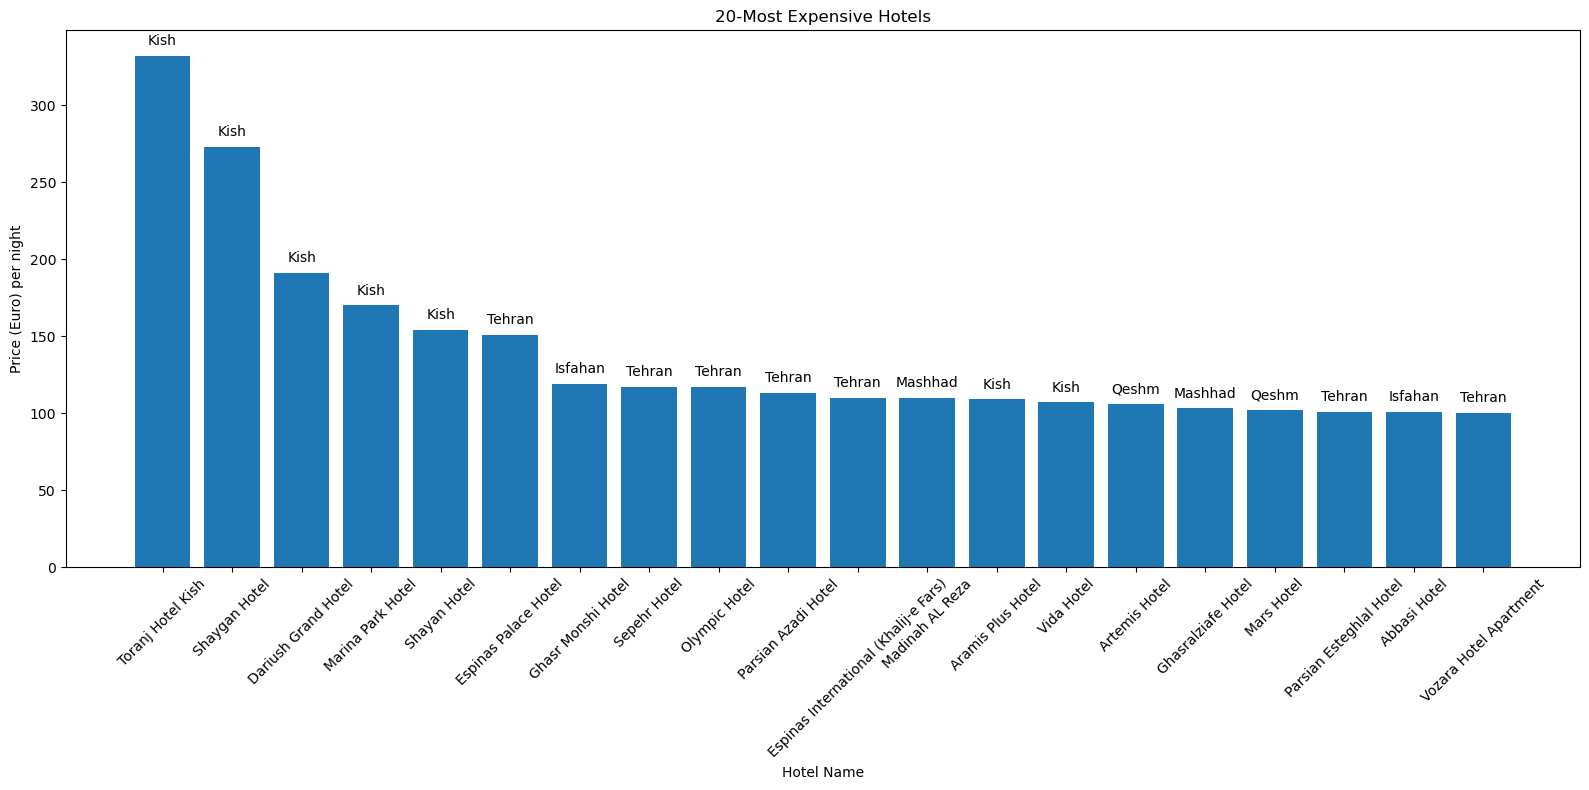

In [73]:
top_20_expensive = hotel_info.nlargest(20,'Price')
#df_top = hotel_info[hotel_info['Price'].isin(top_20_expensive)]

plt.figure(figsize=(16,8))
bars = plt.bar(top_20_expensive['Name'],top_20_expensive['Price'])

for bar,city in zip(bars,top_20_expensive['City']):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+5,city,ha='center',va='bottom')

plt.xlabel('Hotel Name')
plt.ylabel('Price (Euro) per night')
plt.title('20-Most Expensive Hotels')
#plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
city_star_df = hotel_info.groupby(['City','Tag']).size().unstack(fill_value=0)

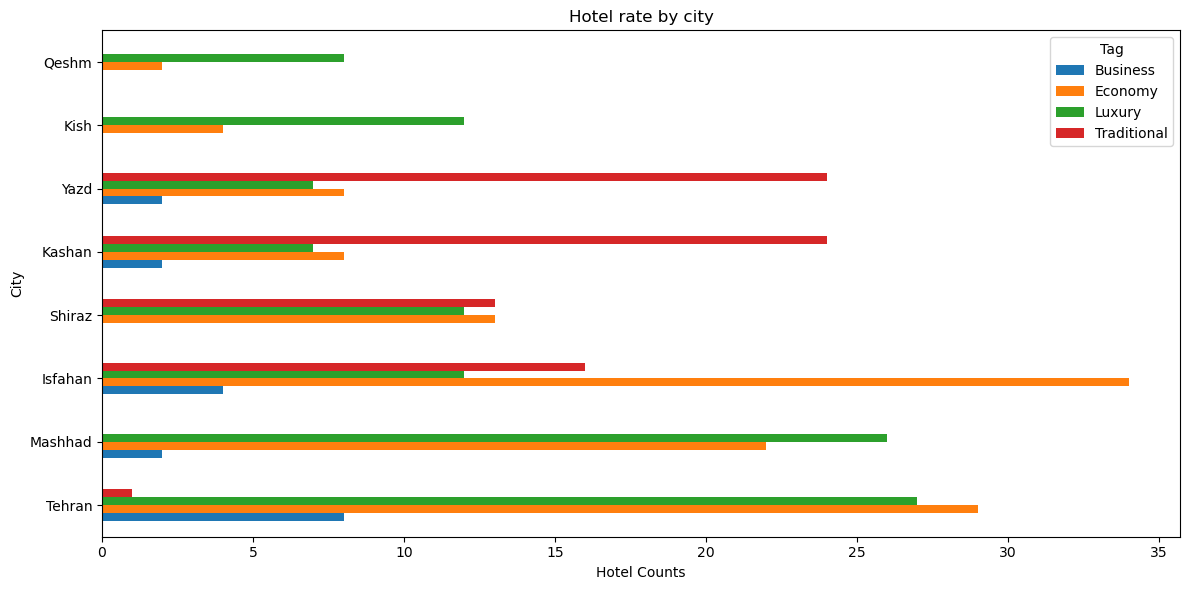

In [71]:
city_order = ['Tehran','Mashhad','Isfahan','Shiraz','Kashan','Yazd','Kish','Qeshm']
city_star_df = city_star_df.reindex(city_order)
city_star_df.plot(kind='barh',figsize=(12,6))
plt.xlabel('Hotel Counts')
plt.ylabel('City')
plt.title('Hotel rate by city')
#plt.gca().invert_yaxis()
plt.xticks(rotation=0)
plt.legend(title='Tag')
plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

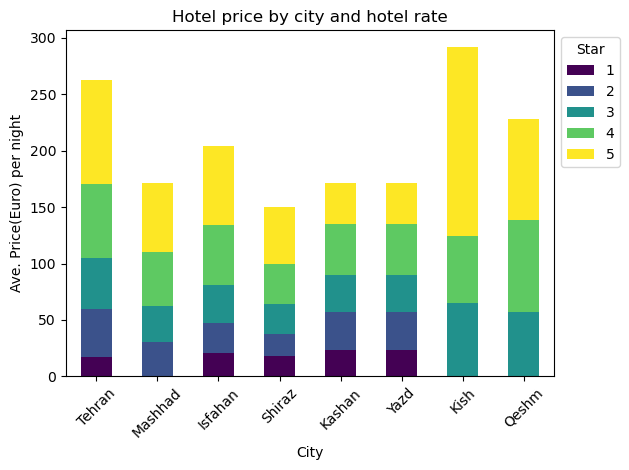

In [58]:
avg_price_rate = hotel_info.groupby(['City','Star'])['Price'].mean().unstack()
city_order = ['Tehran','Mashhad','Isfahan','Shiraz','Kashan','Yazd','Kish','Qeshm']
avg_price_rate = avg_price_rate.reindex(city_order)
plt.figure(figsize=(12,8))
avg_price_rate.plot(kind='bar',stacked=True,colormap='viridis')
plt.xlabel('City')
plt.ylabel('Ave. Price(Euro) per night')
plt.title('Hotel price by city and hotel rate')
plt.legend(title='Star',bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()


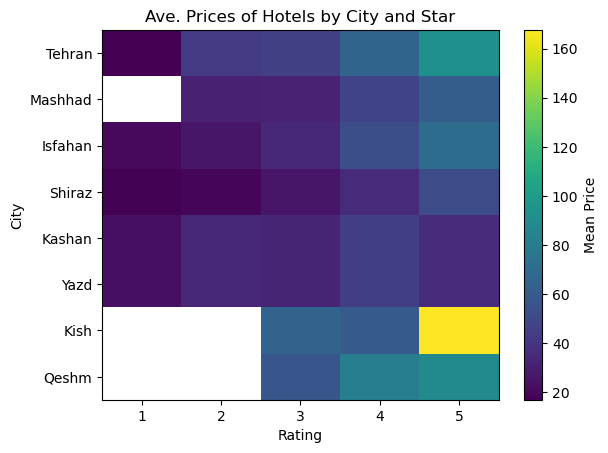

In [59]:
grouped_df = hotel_info.groupby(['City','Star'])['Price'].mean().reset_index()
city_order = ['Tehran','Mashhad','Isfahan','Shiraz','Kashan','Yazd','Kish','Qeshm']
# Heatmap
heatmap_data = grouped_df.pivot(index='City', columns='Star', values='Price')
heatmap_data = heatmap_data.reindex(city_order)
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Mean Price')
plt.title('Ave. Prices of Hotels by City and Star')
plt.xlabel('Rating')
plt.ylabel('City')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.show()